# Introduction to Numpy powered by oneAPI



# Exercises:

Do a page search for each **Exercise** in this notebook. Complete all exercises. Code in cells above each exercise may give insight into a solid approach

In [ ]:

import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline

# SciPy Experiments

Like scikit-learnex, when you can find ready made algorithms to accomplish your objective and others have already optimzied them you should take advantage

This is also the case with **Scipy**.

There are too many algorithms in Scitpy to enumerate here. However, the goal of this notebook is to convince you that spending time in a searh engine or on the scipy website may be more fruitful than hours of programming

The goal here is to provide a few algortithms in the nested loop formulations and have you decribe their behavior. Then search for that behavior online with packages such as Scipy. And have you implement pre-optimized versions

# All Pairs Shortest Path

Below is a naive approach for finding all pairs shortest paths in a directed weighted graph. A single execution of the algorithm will find the lengths (summed weights) of shortest paths between all pairs of vertices. 

It is a triply nested loop, much like Matrix Multiply, but instead of multiplying it applies a min operator

While you can try to experiment with finding good vectorized ways of optimizing with Numpy - it is smarter to look for people who have spent their careers and lively hood finding faster methods. In this case - we will demonstrate a simple implementation using a triply nested loop, and then try to find an algorithm that does the job. 

All pairs shortest path is NOT the same as pairwise distance in the grph explained in the video. In the video all vertices were connected. Here the their a weights to the edges and when an edge is made very large - it could represent two cities separated by a body of water so that no edge connects them driectly. To Get to city C you must got from A to B then to C and not directly from A to C

In [ ]:
# Number of vertices
import numpy as np
import time 

INF = 999

# Algorithm - naive
def floyd_naive(G):
    dist = list(map(lambda p: list(map(lambda q: q, p)), G))
    nV = G.shape[0]
    # Adding vertices individually
    for r in range(nV):
        for p in range(nV):
            for q in range(nV):
                dist[p][q] = min(dist[p][q], dist[p][r] + dist[r][q])
    #sol(dist)
    return np.array(dist)

# Printing the output
def print_solution(dist, nV=4):
    for q in range(nV):
        for p in range(nV):
            if(dist[p][q] == INF):
                print("INF", end=" ")
            else:
                print(dist[p][q], end="  ")
        print(" ")

# G = np.array(
#         [[0, 5, INF, INF],
#          [50, 0, 15, 5],
#          [30, INF, 0, 15],
#          [15, INF, 5, 0]])

np.random.seed(2022)
nV = 500
G = np.random.randint(1, 400 , nV*nV).reshape(nV, nV)
np.fill_diagonal(G, 0)
G[27,33] = INF
G[127,33] = INF
G[227,33] = INF
G[327,33] = INF
G[27,133] = INF
G[27,233] = INF
G[27,333] = INF

speed = []
algo = []
t1 = time.time()
dist = floyd_naive(G)
t2 = time.time()
print(" floyd_naive {} secs".format(t2-t1))
speed.append(t2-t1)
algo.append('floyd_naive')
print_solution(dist, 4)



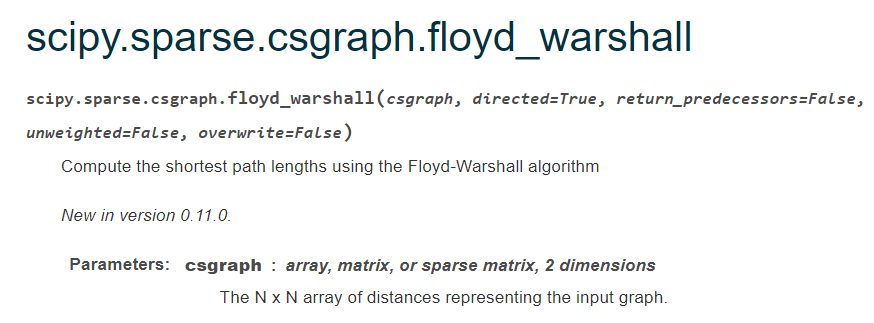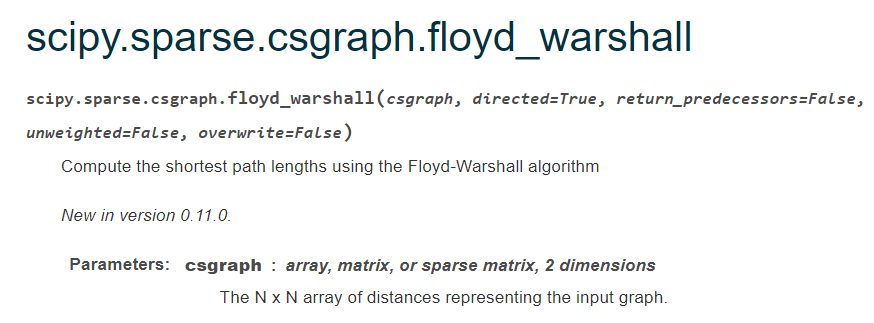Before we attemp to use nupy to try to encode this loop in some vactor approach.

Lets examine the wider domain of knowledge looking for insights

Here is a **search engine result** looking up the phrase:

- **All Pairs Shortest Path**

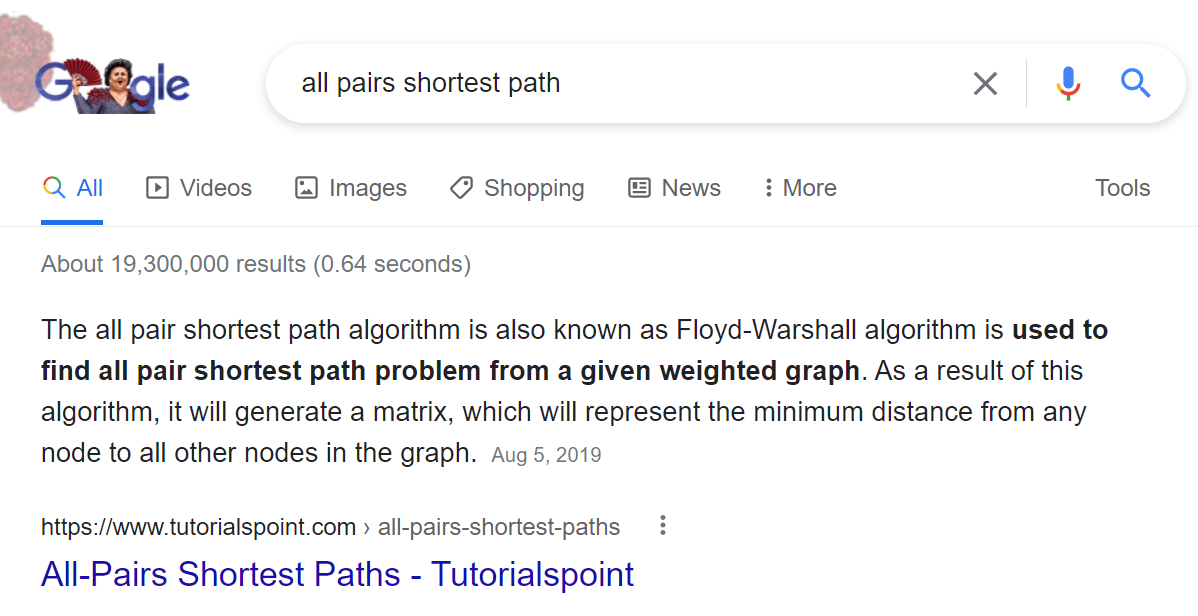

This brings up an interesting looking algorithm name: **Floyd-Warshall algorithm**

Read a bit about the alogirithm

See if someone has encoded it in alibrary - especially a common well oiled one like Scpy

Aha!

A search within scipy turns up two hits:
- Dijkstra
- Floyd-Warshall

Let's look at Floyd's:
- from scipy.sparse import csr_matrix
- from scipy.sparse.csgraph import floyd_warshall
- graph = csr_matrix(graph)

Looks easy enough, and seems to fit

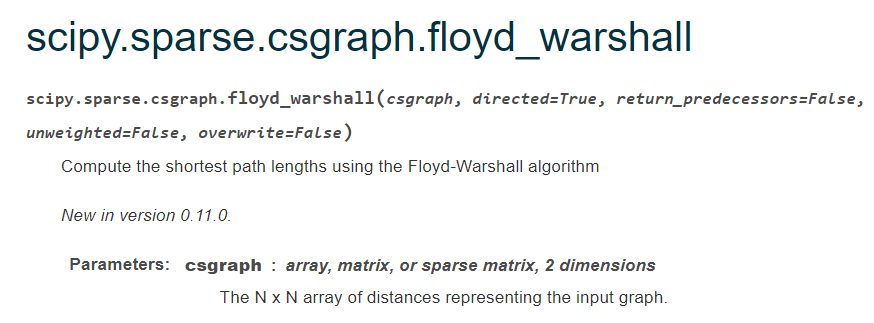

Now we get the same results, hundreds of times faster, the code is more readbale, it will ride on top of new acceleration advances most likely - let's try it

In [ ]:
import scipy as sci
sci.show_config() 

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import floyd_warshall

t1 = time.time()
dist_matrix, predecessors = floyd_warshall(csgraph = G, directed=True, return_predecessors=True)
t2 = time.time()
print("scipy floyd_warshall {} secs".format(t2-t1))
speed.append(t2-t1)
algo.append('scipy floyd_warshall')
dist_matrix.T[:4, :4]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.ylabel("Time taken to process 1 million records in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation=-60)
plt.bar(x = [1,2], height=speed, align='center',tick_label=algo)
print("acceleration: {:4.0f} X".format(speed[0]/speed[-1]))

# Scipy: Find Eigenvalues /Vectors 

Google's founders with the **Page rank algorithm** is essentailly a multibillion dollar Eignvalues cash cow.

Eigenvalues and eigen vectors provide means of solving differntial equations, solving othersie time consuming operations involving raising transition matrices to high powers and many, many other applications. You should wiegh carefully any decision to roll your own eigenvalue solver. Take advantage pre-optimized versions first!

Question:
**whats the fastest way to find eigenvalues/vectors in python?**
[stack overflow - use the linear algebra library in SciPy](https://stackoverflow.com/questions/6684238/whats-the-fastest-way-to-find-eigenvalues-vectors-in-python)

[**Medium.com** What Exactly Eigenvalues and Eigenvectors are?](
https://medium.com/swlh/eigen-theory-from-the-scratch-a73e0b5a25da)

It is sometimes worth experimenting to see whether the **Numpy** or **Scipy** version of a routine is faster

Sometimes you just go for Numpy or Scipy alogorithms for convenience becasue reinventing the wheel will almost certainly be slower and prone to errors - Just assume we get performance and move on!

If there are two approaches - one in Scipy and one in Numpy then you should race the two and see who wins


In [ ]:
from scipy import linalg as LA
import time

A = np.random.randint(1, 10, 25000000).reshape(5000, 5000)
t1=time.time()
e_vals, e_vecs = LA.eig(A)
t2=time.time()
print("LA.eig(A) {} secs".format(t2-t1))

t1=time.time()
np.linalg.eigvals(A)
t2=time.time()
print("np.linalg.eigval {} secs".format(t2-t1))

# Consider

### Algorithm to compute spectrogram 

Compute spectrogram of multiple two second snippets of audio from a youtube video and use a CNN to classify the "pictures" of sounds. Find a scipy algorithm to computes spectrograms

Other domains to peruse:

- Signal processing of wav files inlcuding FFT's
- Elliptic functions and integrals
- Bessel functions
- Linear Algebra routines
- Eigenvalue Problems
- Multivariate interpolation
- Splines
- Optimizations and root finding
- Numerical Integration
- Image Manipulation

In [ ]:
print("Done")